# Hello!

**Context**

In this notebook, I'm going to analyze the education in my country: Brazil.

My goal is to create insights that could improve our education through data analysis.

# Steps    

**1)** Find the right metrics to measure the quality of education in Brazil

**2)** Find which countries are comparable to Brazil through clustering

**3)** Create insights

# Starting

First, import the python libraries

In [2]:
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns

/Users/marcello/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Then, connect to the database

In [3]:
server = 'datagov.cwiuiltpeuyr.sa-east-1.rds.amazonaws.com,1433' 
database = 'DB_OECD' 
username = 'admin' 
password = 'E21m89d02m04' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

# **1)** Find the right metrics to measure the quality of education in Brazil

### Get the data

In [4]:
query_math = ("SELECT * FROM PISA.MATHEMATICS_PERFORMANCE")
query_read = ("SELECT * FROM PISA.READING_PERFORMANCE")
query_sci = ("SELECT * FROM PISA.SCIENCE_PERFORMANCE")
df_math = pd.read_sql(query_math,con=cnxn)
df_read = pd.read_sql(query_read,con=cnxn)
df_sci = pd.read_sql(query_sci,con=cnxn)

Check the data

In [5]:
df_math.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag_Codes
0,AUS,PISAMATH,BOY,MEANSCORE,A,2003,527.000,None
1,AUS,PISAMATH,BOY,MEANSCORE,A,2006,527.000,None
2,AUS,PISAMATH,BOY,MEANSCORE,A,2009,519.000,None
3,AUS,PISAMATH,BOY,MEANSCORE,A,2012,510.115,None
4,AUS,PISAMATH,BOY,MEANSCORE,A,2015,497.000,None


In [6]:
df_read.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag_Codes
0,AUS,PISAREAD,BOY,MEANSCORE,A,2000,513.00,None
1,AUS,PISAREAD,BOY,MEANSCORE,A,2003,506.00,None
2,AUS,PISAREAD,BOY,MEANSCORE,A,2006,495.00,None
3,AUS,PISAREAD,BOY,MEANSCORE,A,2009,496.00,None
4,AUS,PISAREAD,BOY,MEANSCORE,A,2012,495.09,None


In [7]:
df_sci.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag_Codes
0,AUS,PISASCIENCE,BOY,MEANSCORE,A,2006,527.000,None
1,AUS,PISASCIENCE,BOY,MEANSCORE,A,2009,527.000,None
2,AUS,PISASCIENCE,BOY,MEANSCORE,A,2012,523.728,None
3,AUS,PISASCIENCE,BOY,MEANSCORE,A,2015,511.000,None
4,AUS,PISASCIENCE,BOY,MEANSCORE,A,2018,504.000,None


### Data cleaning

Let's check the column 'Subject'

In [8]:
df_math['SUBJECT'].value_counts()

TOT     236
GIRL    232
BOY     232
Name: SUBJECT, dtype: int64

We will be using only the value 'TOT' for this column. And we need to remove the 'Location' OAVG. Let's filter

In [9]:
df_math = df_math[(df_math.SUBJECT == 'TOT') & (df_math.LOCATION != 'OAVG')]
df_read = df_read[(df_read.SUBJECT == 'TOT') & (df_read.LOCATION != 'OAVG')]
df_sci = df_sci[(df_sci.SUBJECT == 'TOT') & (df_sci.LOCATION != 'OAVG')]

Now we only want the values of the column 'Value' where they are not null. Let's filter

In [10]:
df_math = df_math[df_math.Value.notnull()]
df_read = df_read[df_read.Value.notnull()]
df_sci = df_sci[df_sci.Value.notnull()]

Now we plot the data! For the plot, let's get only the last year of the data

In [11]:
year = df_math['TIME'].max()
print(year)

2018


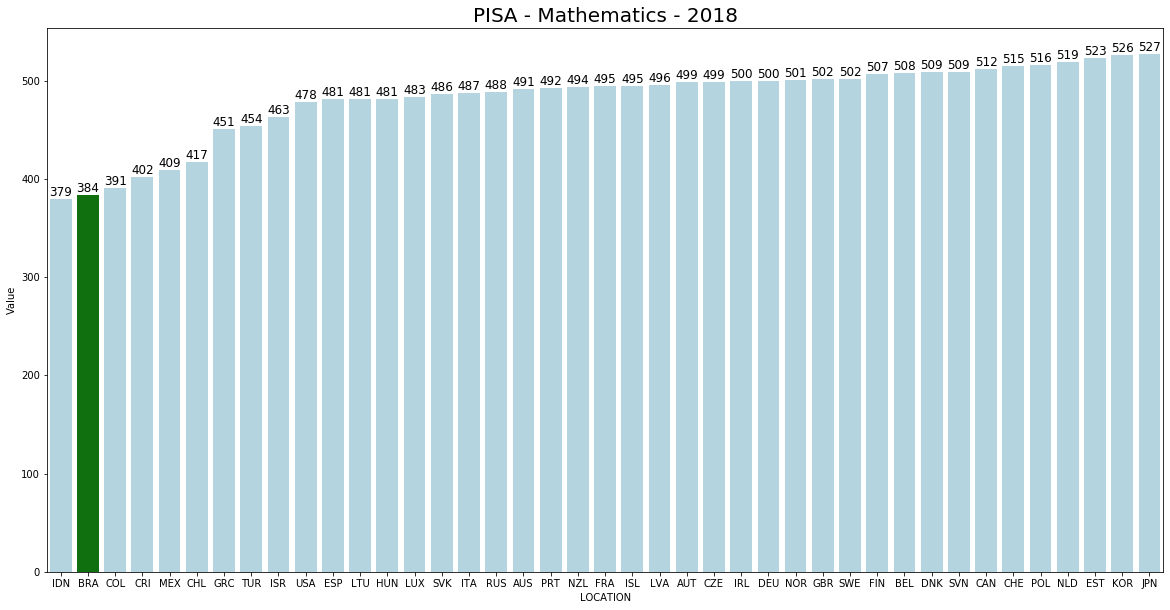

In [12]:
# filter and select data for plot
plot_math = df_math[df_math.TIME == year].sort_values('Value').reset_index()
x = plot_math['LOCATION']
y = plot_math['Value']

# plot
f, ax = plt.subplots(figsize=(20, 10))
clrs = ['lightblue' if (z != 'BRA') else 'green' for z in x]
sns.barplot(x=x, y=y, color='lightblue', palette=clrs)

for m in ax.patches:
    m_height = m.get_height()
    plt.text(m.get_x() + m.get_width()/2.0, m_height, '%d' % int(m_height), ha='center', va='bottom', fontsize=12)

title = 'PISA - Mathematics - ' + str(year)
plt.title(title, fontsize=20)
plt.show()

In [13]:
year = df_read['TIME'].max()
print(year)

2018


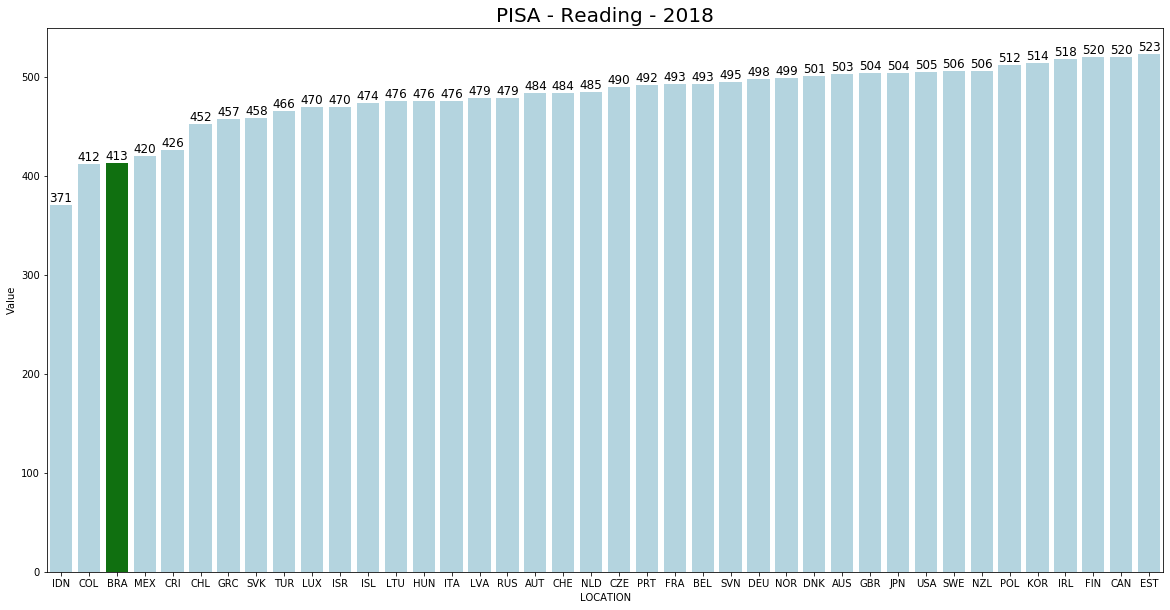

In [14]:
# filter and select data for plot
plot_read = df_read[df_read.TIME == year].sort_values('Value').reset_index()
x = plot_read['LOCATION']
y = plot_read['Value']

# plot
f, ax = plt.subplots(figsize=(20, 10))
clrs = ['lightblue' if (z != 'BRA') else 'green' for z in x]
sns.barplot(x=x, y=y, color='lightblue', palette=clrs)

for r in ax.patches:
    height = r.get_height()
    plt.text(r.get_x() + r.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

title = 'PISA - Reading - ' + str(year)
plt.title(title, fontsize=20)
plt.show()


In [15]:
year = df_sci['TIME'].max()
print(year)

2018


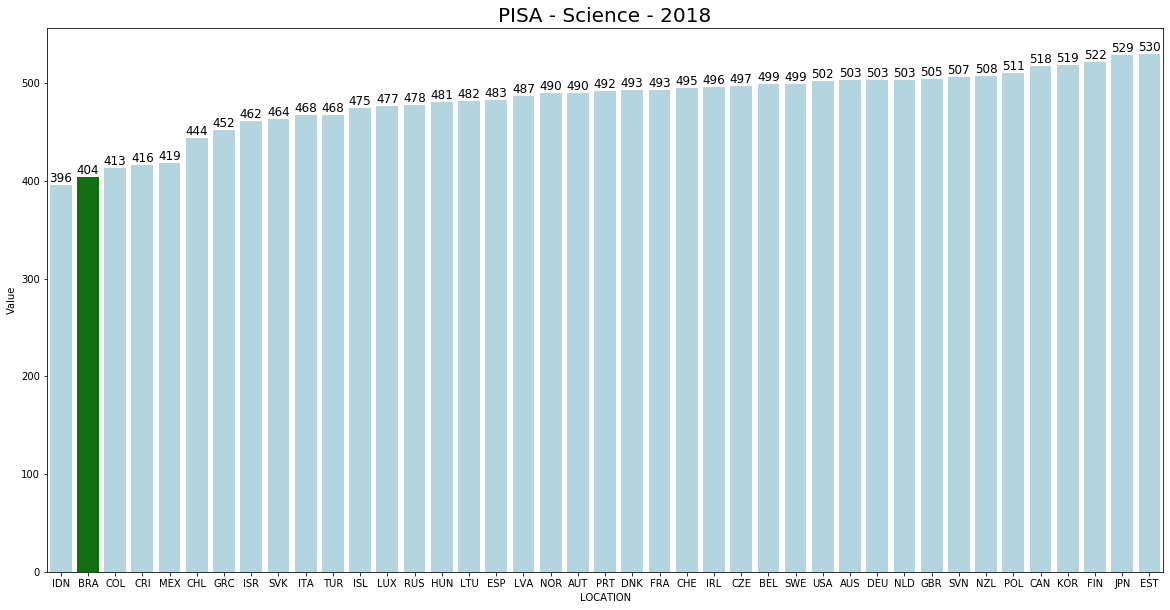

In [116]:
# filter and select data for plot
plot_sci = df_sci[df_sci.TIME == year].sort_values('Value').reset_index()
x = plot_sci['LOCATION']
y = plot_sci['Value']

# plot
f, ax = plt.subplots(figsize=(20, 10))
clrs = ['lightblue' if (z != 'BRA') else 'green' for z in x]
sns.barplot(x=x, y=y, color='lightblue', palette=clrs)

for s in ax.patches:
    height = s.get_height()
    plt.text(s.get_x() + s.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=12)

title = 'PISA - Science - ' + str(year)
plt.title(title, fontsize=20)
plt.show()

Brazil is the 2nd worst in Math, the 3rd worst in Reading and the 2nd worst in Science... =/

But that won't mean much if the all the countries have similar results.

Let's check how many standard deviations Brazil's results are from the mean in each topic:

In [117]:
# Formula: (Brazil result - Mean) / Standard Deviation
def fn_std_unit(value, mean, std):
    x = (value - mean) / std
    return round(x, 1)

In [118]:
bra = plot_math['Value'][plot_math.LOCATION == 'BRA'].iloc[0]
mean = round(plot_math['Value'].mean(), 1)
std = round(plot_math['Value'].std(), 1)

print('====')
print('Math')
print('====')
print()
print('Brazil = ' + str(bra))
print('Mean = ' + str(mean))
print('Standard Deviation = ' + str(std))

std_unit = fn_std_unit(bra,mean,std)

print('Quantity of standard deviations from the mean = '+ str(std_unit))

====
Math
====

Brazil = 384.0
Mean = 481.8
Standard Deviation = 39.6
Quantity of standard deviations from the mean = -2.5


Brazil is -2.5 standard deviations from the mean in Math. If it was -1 standard deviation, it would be acceptable.

Let's check Reading and Science

In [119]:
# Reading

bra = plot_read['Value'][plot_read.LOCATION == 'BRA'].iloc[0]
mean = round(plot_read['Value'].mean(), 1)
std = round(plot_read['Value'].std(), 1)

print('=======')
print('Reading')
print('=======')
print()
print('Brazil = ' + str(bra))
print('Mean = ' + str(mean))
print('Standard Deviation = ' + str(std))

std_unit = fn_std_unit(bra,mean,std)

print('Quantity of standard deviations from the mean = '+ str(std_unit))

# Science

bra = plot_sci['Value'][plot_sci.LOCATION == 'BRA'].iloc[0]
mean = round(plot_sci['Value'].mean(), 1)
std = round(plot_sci['Value'].std(), 1)

print()
print('=======')
print('Science')
print('=======')
print()
print('Brazil = ' + str(bra))
print('Mean = ' + str(mean))
print('Standard Deviation = ' + str(std))

std_unit = fn_std_unit(bra,mean,std)

print('Quantity of standard deviations from the mean = '+ str(std_unit))

Reading

Brazil = 413.0
Mean = 480.6
Standard Deviation = 33.6
Quantity of standard deviations from the mean = -2.0

Science

Brazil = 404.0
Mean = 482.3
Standard Deviation = 33.5
Quantity of standard deviations from the mean = -2.3


In [120]:
y.skew()

-1.1235010681061888

In [114]:
type(y)

pandas.core.series.Series

In [124]:
outliers = [1000,2000,3000,4000]
y = y.append(pd.Series(outliers))

In [130]:
print('y')
print('skewness: ',float(y.skew()))
print('kurtosis: ',float(y.kurt()))
print('mean: ',float(y.mean()))
print('median: ',float(y.median()))
print()


umdez_normal = pd.DataFrame([1,2,3,4,5,5,5,5,5,5,6,7,8,9,10])
umdez = pd.DataFrame([1,2,3,4,5,6,7])
print('umdez_normal')
print('skewness: ',float(umdez_normal.skew()))
print('kurtosis: ',float(umdez_normal.kurt()))
print('mean: ',float(umdez_normal.mean()))
print('median: ',float(umdez_normal.median()))
print()
print('umdez')
print('skewness: ',float(umdez.skew()))
print('kurtosis: ',float(umdez.kurt()))
print('mean: ',float(umdez.mean()))
print('median: ',float(umdez.median()))
print()

umdezcem_normal = pd.DataFrame([1,2,3,4,5,5,5,5,5,5,6,7,8,9,10,100])
umdezcem = pd.DataFrame([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10])
print('umdezcem_normal')
print('skewness: ',float(umdezcem_normal.skew()))
print('kurtosis: ',float(umdezcem_normal.kurt()))
print('mean: ',float(umdezcem_normal.mean()))
print('median: ',float(umdezcem_normal.median()))
print()
print('umdezcem')
print('skewness: ',float(umdezcem.skew()))
print('kurtosis: ',float(umdezcem.kurt()))
print('mean: ',float(umdezcem.mean()))
print('median: ',float(umdezcem.median()))
print('mean: ',float(umdezcem.mean()))
print('median: ',float(umdezcem.median()))

y
skewness:  2.7789712976205694
kurtosis:  6.853443885638443
mean:  811.6938775510204
median:  496.0

umdez_normal
skewness:  0.23331518667108045
kurtosis:  0.022227692307692504
mean:  5.333333333333333
median:  5.0

umdez
skewness:  0.0
kurtosis:  -1.2000000000000002
mean:  4.0
median:  4.0

umdezcem_normal
skewness:  3.933073447100991
kurtosis:  15.620298837050086
mean:  11.25
median:  5.0

umdezcem
skewness:  0.15146310708295874
kurtosis:  -1.3569849115504673
mean:  0.45999999999999996
median:  0.45
mean:  0.45999999999999996
median:  0.45


In [204]:
teste = pd.DataFrame([1]*20000).append([1000 for i in range(20000)])
#print(teste)
print('kurtosis: ',float(teste.kurt()))
print('skewness: ',float(teste.skew()))
print('mean: ',float(teste.mean()))
print('median: ',float(teste.median()))

kurtosis:  -2.0001000075005626
skewness:  0.0
mean:  500.5
median:  500.5


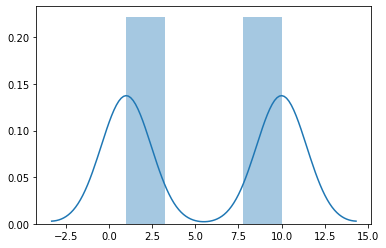

In [193]:
sns.distplot(teste)